# Generate Candidate-Job Feature Score

Saved: semantic_feature_test_dataset.csv


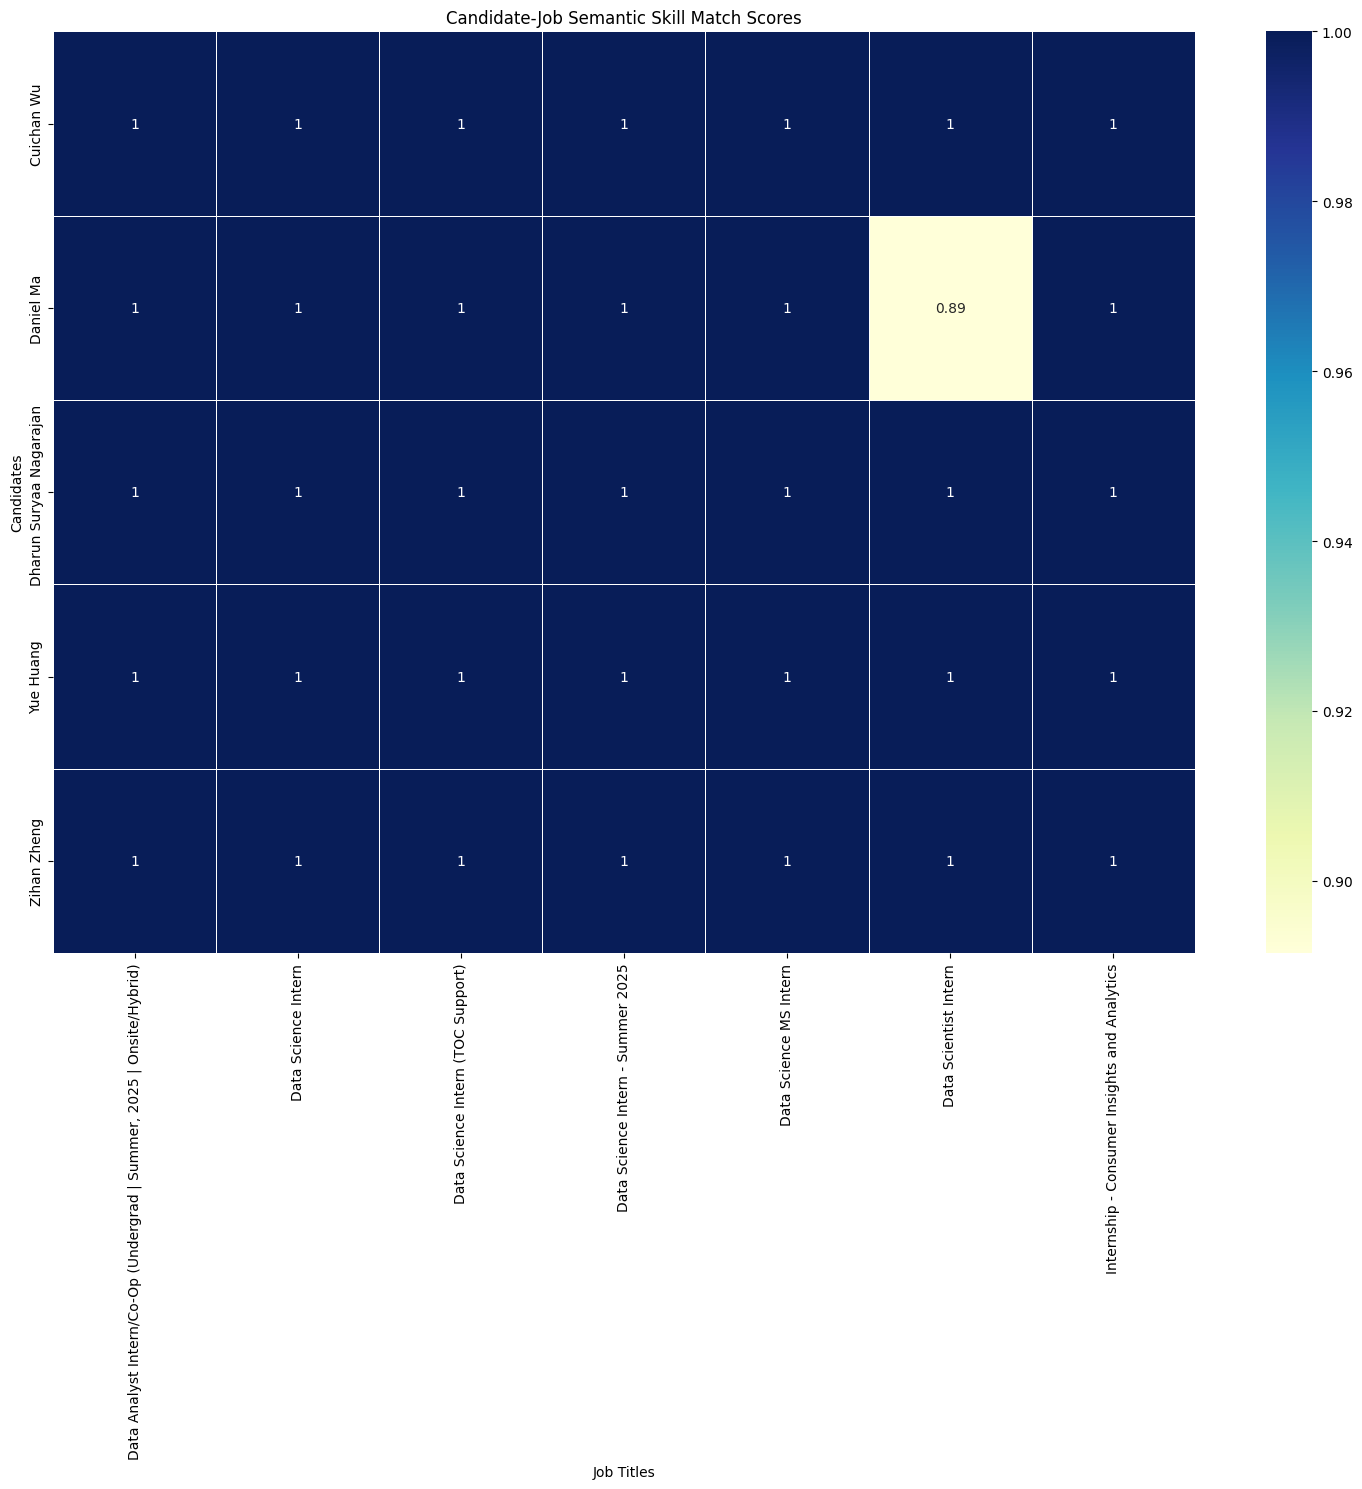

In [7]:
# Enhanced Semantic Matching with Skill-wise Scoring 

import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
candidates_df = pd.read_csv("test_candidateprofiles_dataset.csv", encoding='latin1')
jobs_df = pd.read_csv("test_jobs_dataset.csv", encoding='utf-8')

# Initialize Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract candidate skills
def extract_candidate_skills(skills_text):
    if pd.isna(skills_text):
        return []
    return [skill.strip() for skill in re.split(r",|;", skills_text) if skill.strip()]

# Extract job skills from job description
def extract_job_skills(job_desc):
    match = re.search(r"SKILLS\s*:\s*(.*?)(?:\.|QUALIFICATIONS:|RESPONSIBILITIES:|LOCATION:|PAY:|APPLICATION DEADLINE:|JOB ID:|$)", 
                      job_desc, re.IGNORECASE | re.DOTALL)
    return [skill.strip() for skill in re.split(r",|;", match.group(1)) if skill.strip()] if match else []

# Precompute embeddings for all job skills
job_skill_embeddings = {}
job_skill_lists = {}

for _, job in jobs_df.iterrows():
    job_id = job['Job_ID']
    job_skills = extract_job_skills(job['Job_Description'])
    job_skill_lists[job_id] = job_skills
    job_skill_embeddings[job_id] = model.encode(job_skills) if job_skills else []

# Compute pairwise skill similarity
results = []

for _, c_row in candidates_df.iterrows():
    candidate_id = c_row['Candidate_ID']
    candidate_name = c_row['Name']
    candidate_skills = extract_candidate_skills(c_row['Skills'])
    candidate_embeddings = model.encode(candidate_skills) if candidate_skills else []

    for _, j_row in jobs_df.iterrows():
        job_id = j_row['Job_ID']
        job_title = j_row['Job_Title']
        company = j_row['Company']
        job_skills = job_skill_lists[job_id]
        job_embeddings = job_skill_embeddings[job_id]

        if len(candidate_embeddings) > 0 and len(job_embeddings) > 0:
            sim_matrix = cosine_similarity(candidate_embeddings, job_embeddings)
            matched_pairs = []
            threshold = 0.5
            for i, c_skill in enumerate(candidate_skills):
                for j, j_skill in enumerate(job_skills):
                    sim = sim_matrix[i][j]
                    if sim >= threshold:
                        matched_pairs.append((c_skill, j_skill, sim))
            overall_score = sim_matrix.max() if matched_pairs else 0.0
        else:
            matched_pairs = []
            overall_score = 0.0

        results.append({
            "Candidate_ID": candidate_id,
            "Candidate_Name": candidate_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "skills_semantic_score": round(overall_score, 4),
            "experience_semantic_score": "NONE",
            "project_semantic_score": "NONE",
            "education_semantic_score": "NONE",
            "overall_semantic_match_score": "NONE",
            "Label (Ranking)": "NONE"
        })

# Convert to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv("semantic_feature_test_dataset.csv", index=False)
print("Saved: semantic_feature_test_dataset.csv")

# Visualize: Heatmap
matrix_df = results_df.pivot_table(
    index="Candidate_Name",
    columns="Job_Title",
    values="skills_semantic_score",
    aggfunc="max"  # or mean
).astype(float)

plt.figure(figsize=(15, 15))
sns.heatmap(matrix_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Candidate-Job Semantic Skill Match Scores")
plt.xlabel("Job Titles")
plt.ylabel("Candidates")
plt.tight_layout()
plt.show()


employment semantic score

 Updated CSV with 'experience_semantic_score' saved.


C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


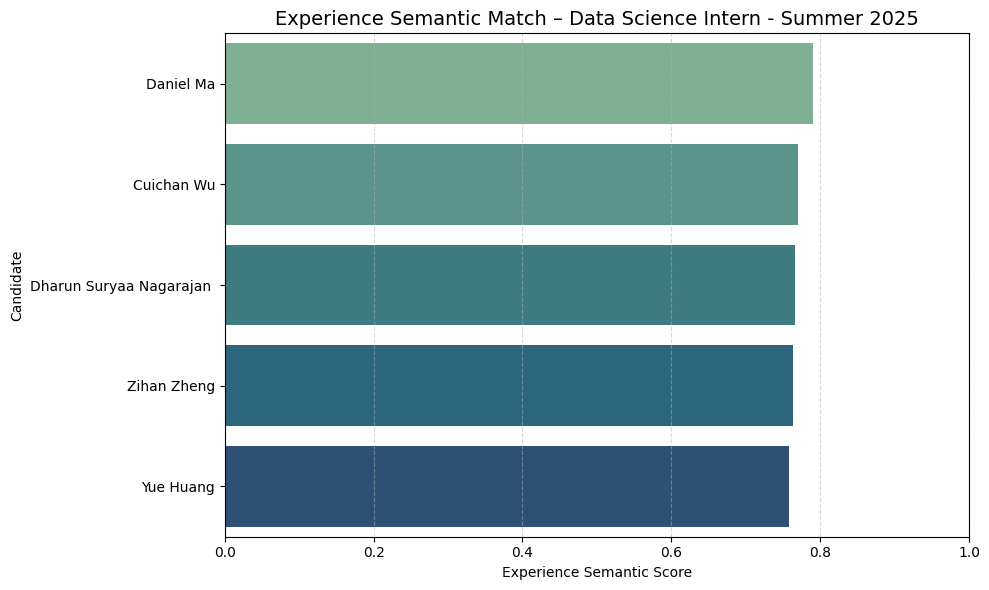

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


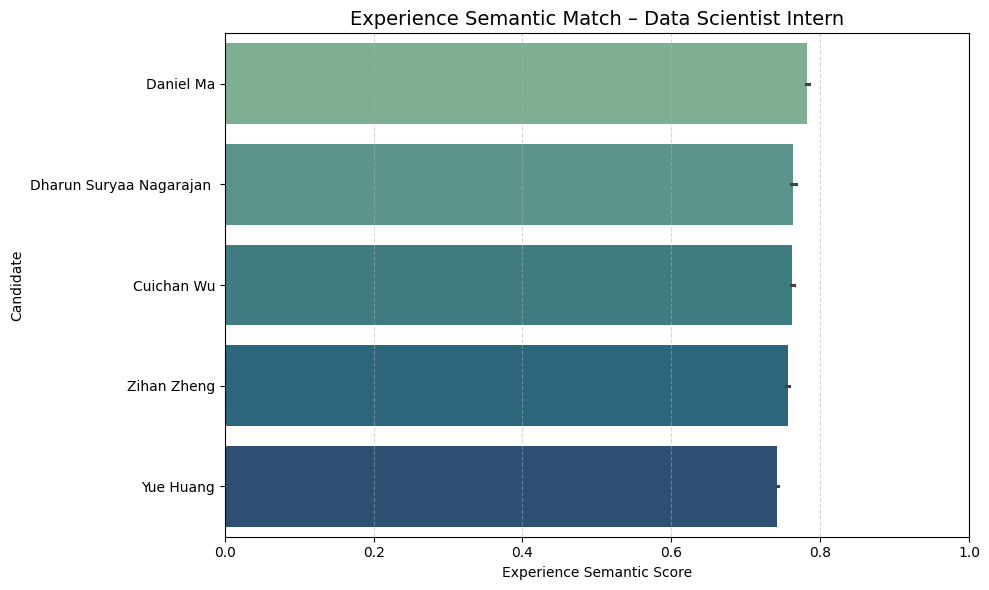

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


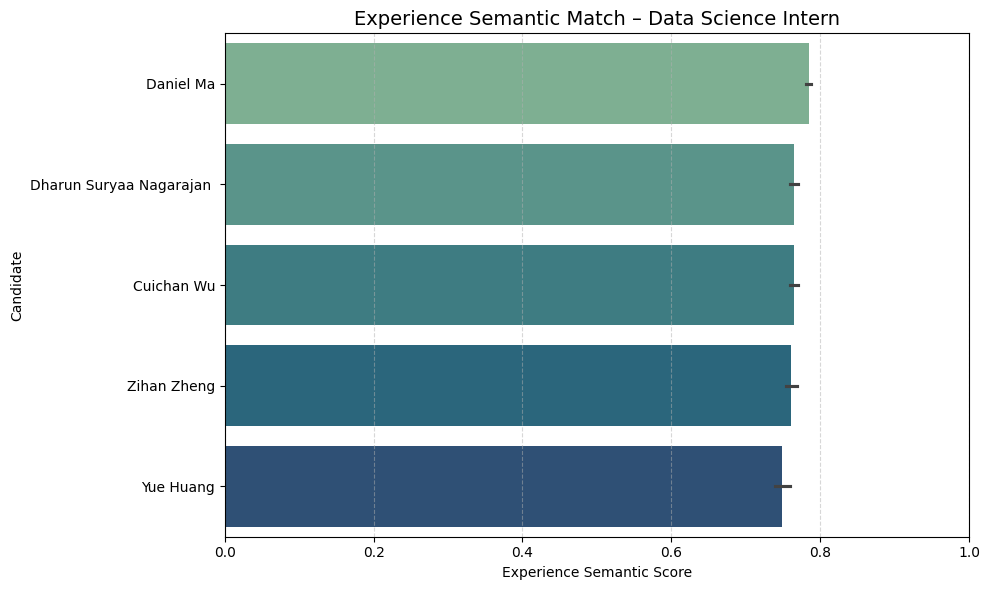

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


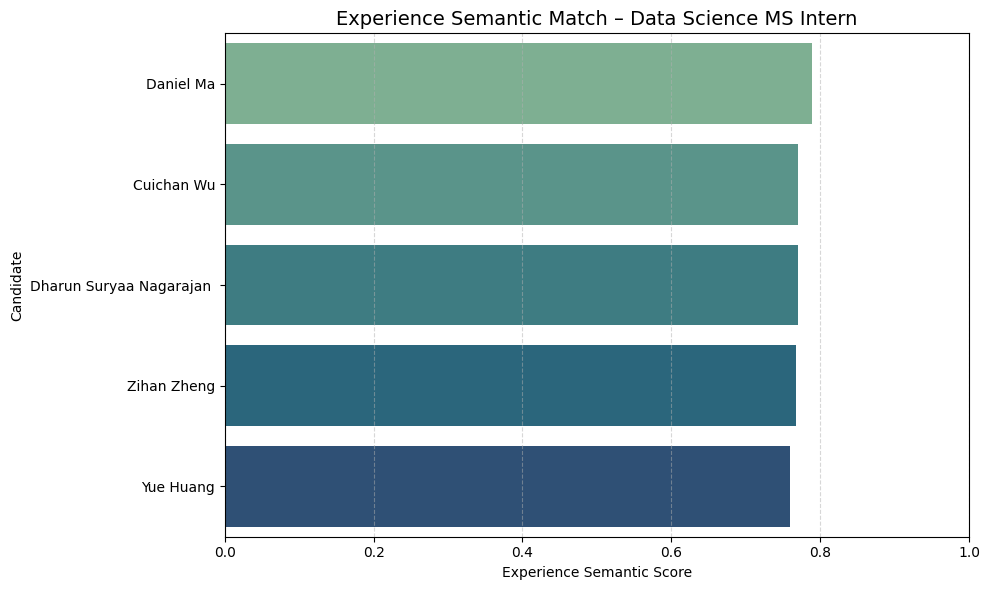

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


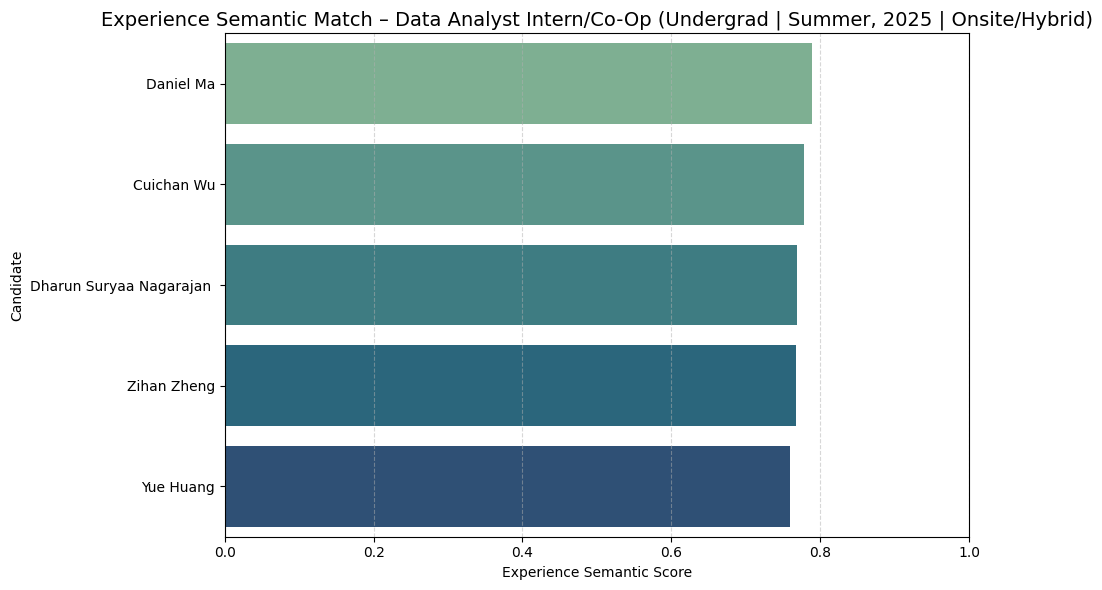

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


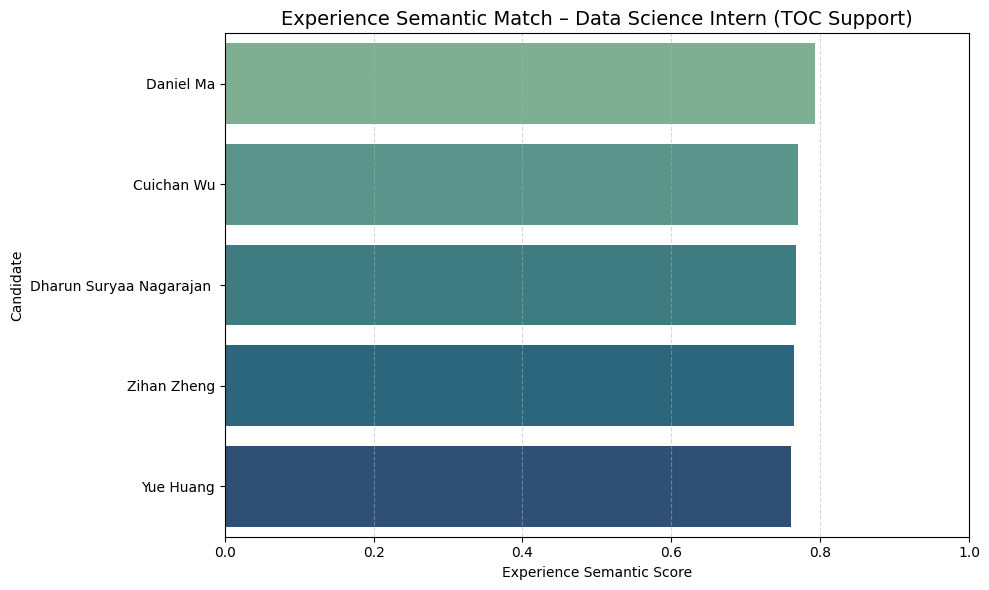

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\887669216.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")


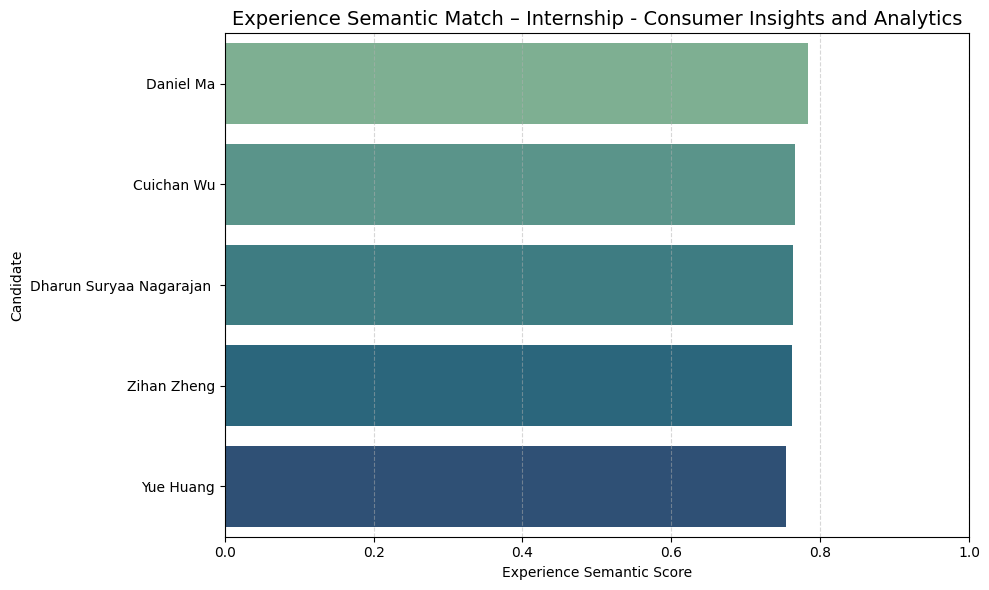

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load Data
feature_df = pd.read_csv("semantic_feature_test_dataset.csv")
candidates_df = pd.read_csv("test_candidateprofiles_dataset.csv", encoding='latin1')
jobs_df = pd.read_csv("test_jobs_dataset.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job responsibilities and skills
def extract_job_details(text):
    resp_match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    skills_match = re.search(r"SKILLS:\s*(.*?)(?:RESPONSIBILITIES:|QUALIFICATIONS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    resp = resp_match.group(1).strip() if resp_match else ""
    skills = skills_match.group(1).strip() if skills_match else ""
    return resp, skills

# Split and parse employment records
def split_experiences(blob):
    return [e.strip() for e in str(blob).split('|') if e.strip()]

def parse_experience(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    return {
        "description": parts.get("Employment_Description", "").strip(),
        "skills": [s.strip() for s in parts.get("Employment_Skills", "").split(',') if s.strip()]
    }

# Sentence/Skill-level scoring using ensemble
def get_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Store scores
exp_score_logs = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_resp, job_skills = extract_job_details(job_row["Job_Description"])
    job_resp_sents = [s.strip() for s in re.split(r'[.\n]', job_resp) if s.strip()]
    job_skill_parts = [s.strip() for s in job_skills.split(',') if s.strip()]
    job_contexts = job_resp_sents + job_skill_parts

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        experiences = split_experiences(cand_row["Experience"])

        scores = []
        detailed_logs = []

        for exp in experiences:
            parsed = parse_experience(exp)
            desc_scores = []
            skill_scores = []

            # Description sentence-level semantic matching
            for sent in re.split(r'[.\n]', parsed["description"]):
                sent = sent.strip()
                if sent:
                    sent_scores = [get_ensemble_score(sent, ctx) for ctx in job_contexts]
                    desc_scores.append(max(sent_scores))

            # Skills-level semantic matching
            for skill in parsed["skills"]:
                skill_scores += [get_ensemble_score(skill, ctx) for ctx in job_contexts]

            desc_avg = sum(desc_scores)/len(desc_scores) if desc_scores else 0.0
            skill_avg = sum(skill_scores)/len(skill_scores) if skill_scores else 0.0

            final_score = (desc_avg + skill_avg) / 2  # equal weight

            if final_score > 0:
                scores.append(final_score)
                #detailed_logs.append((parsed["description"][:60] + "...", round(desc_avg, 4), round(skill_avg, 4), round(final_score, 4)))

        top_k = sorted(scores, reverse=True)[:3]
        avg_score = round(sum(top_k) / len(top_k), 4) if top_k else 0.0

        '''print(f"\n Candidate: {cand_name} → Job: {job_title}")
        for log in detailed_logs:
            print(f"Desc: {log[0]}\n     → Desc Score: {log[1]} | Skill Score: {log[2]} | Final: {log[3]}")'''

        exp_score_logs.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "experience_semantic_score": avg_score,
            "Match (%)": f"{round(avg_score * 100)}%"
        })

# Convert to DataFrame
exp_df = pd.DataFrame(exp_score_logs)
# Save to CSV
merged_df = pd.merge(feature_df, exp_df[["Candidate_ID", "Job_ID", "experience_semantic_score"]],
                      on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["experience_semantic_score"] = merged_df["experience_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["experience_semantic_score_new"], inplace=True)
merged_df.to_csv("semantic_feature_test_dataset.csv", index=False)
print(" Updated CSV with 'experience_semantic_score' saved.")

# === Visualization per job ===
for job in exp_df["Job_Title"].unique():
    subset = exp_df[exp_df["Job_Title"] == job].sort_values(by="experience_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")
    plt.title(f"Experience Semantic Match – {job}", fontsize=14)
    plt.xlabel("Experience Semantic Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

project_semantic_score

Updated: 'project_semantic_score' column added to semantic_feature_test_dataset.csv


C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


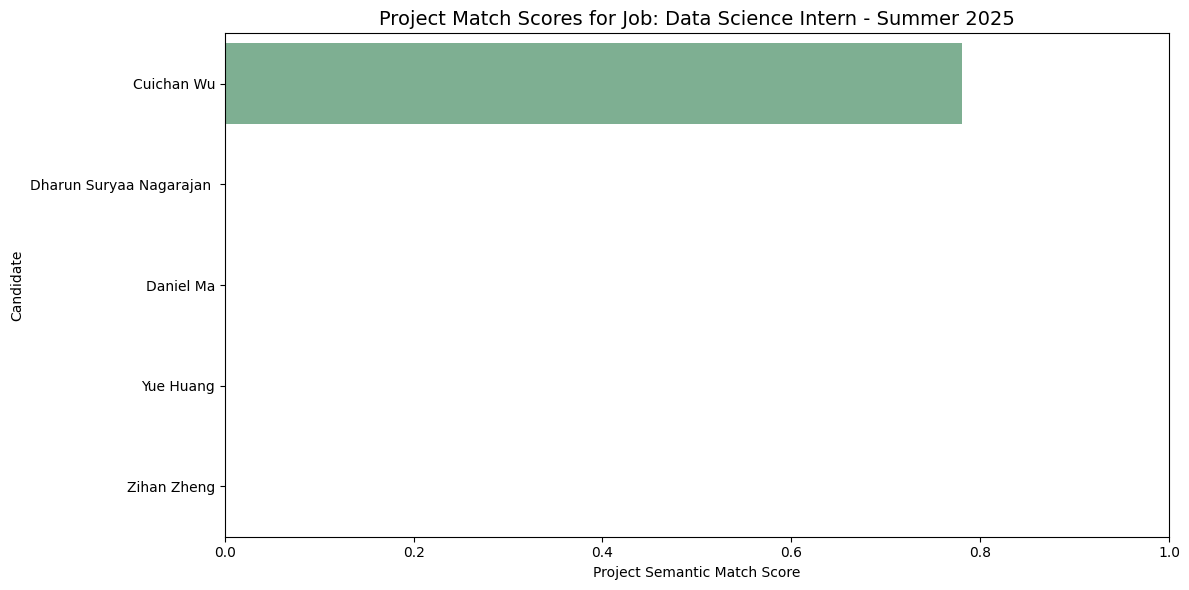

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


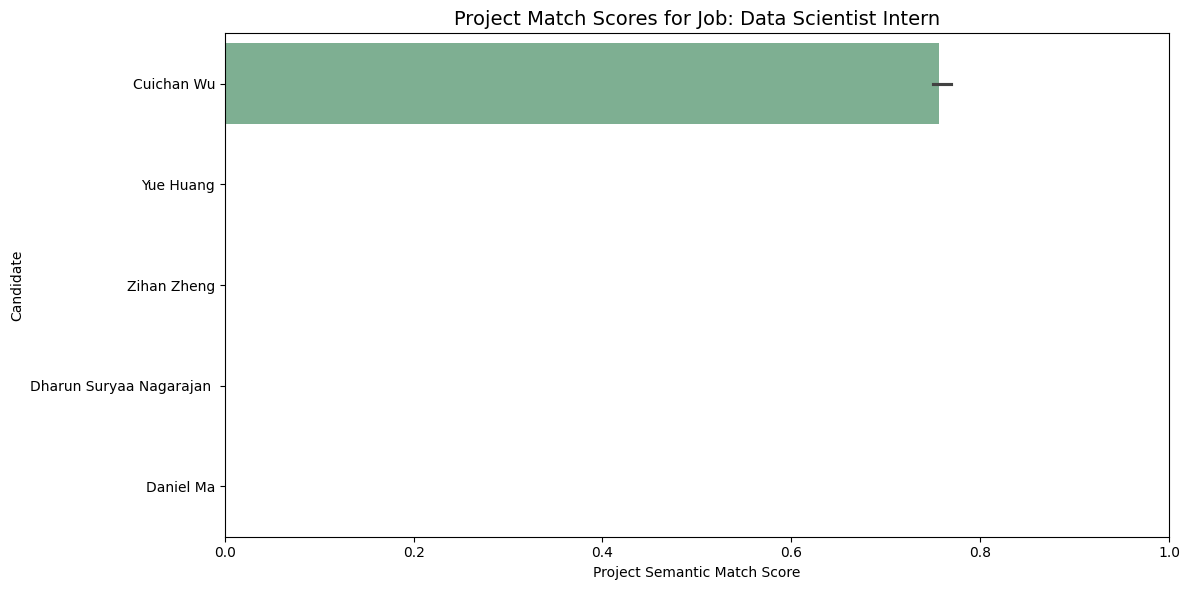

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


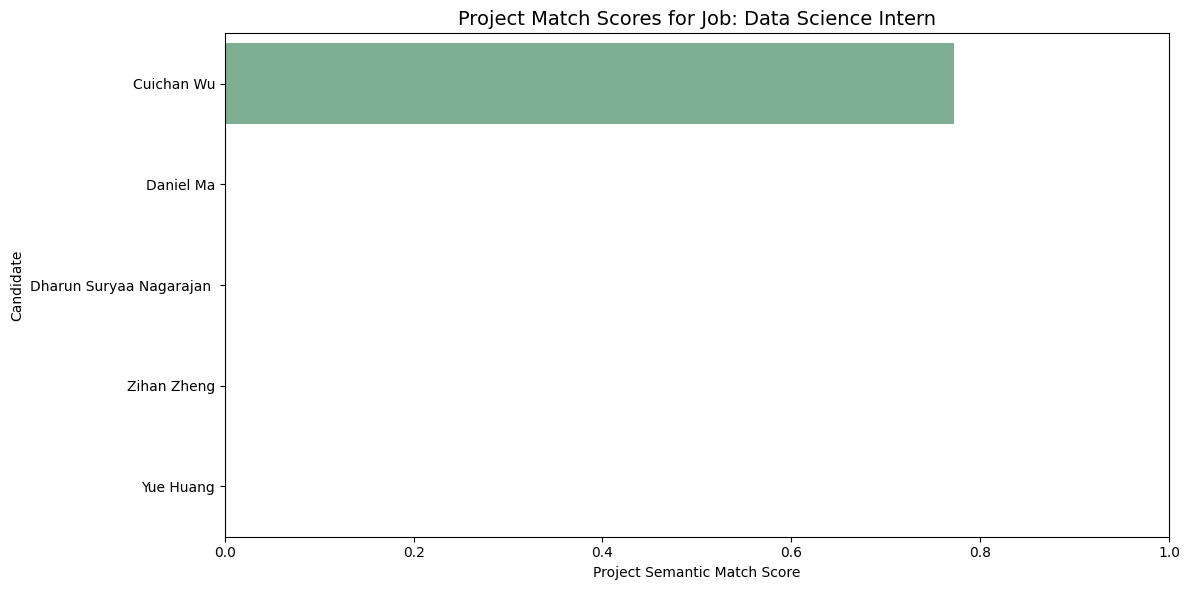

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


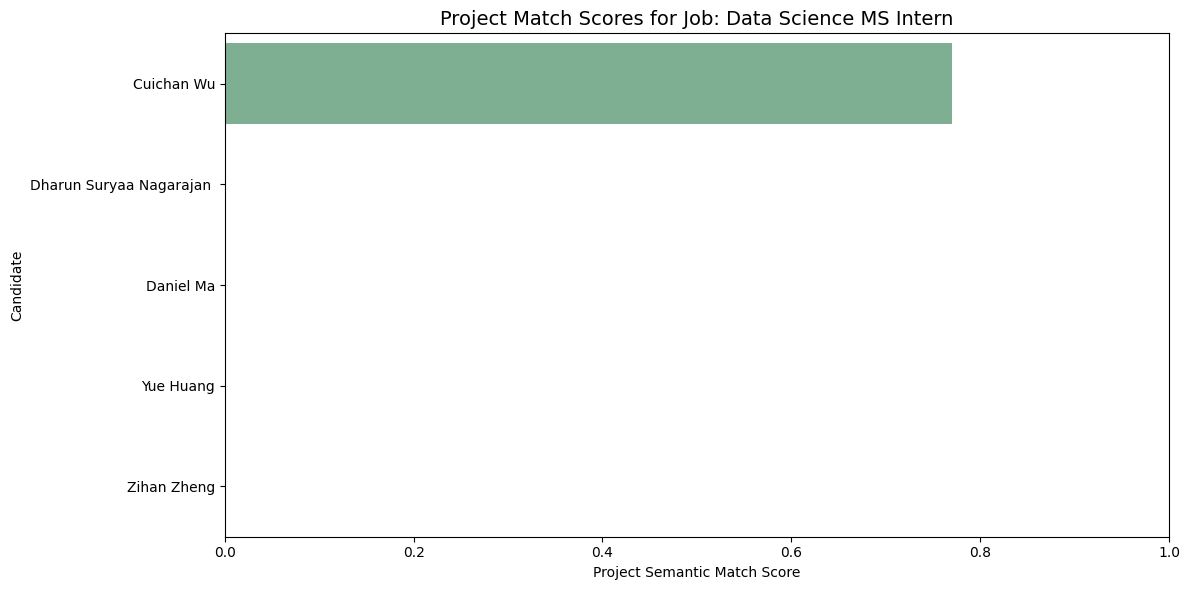

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


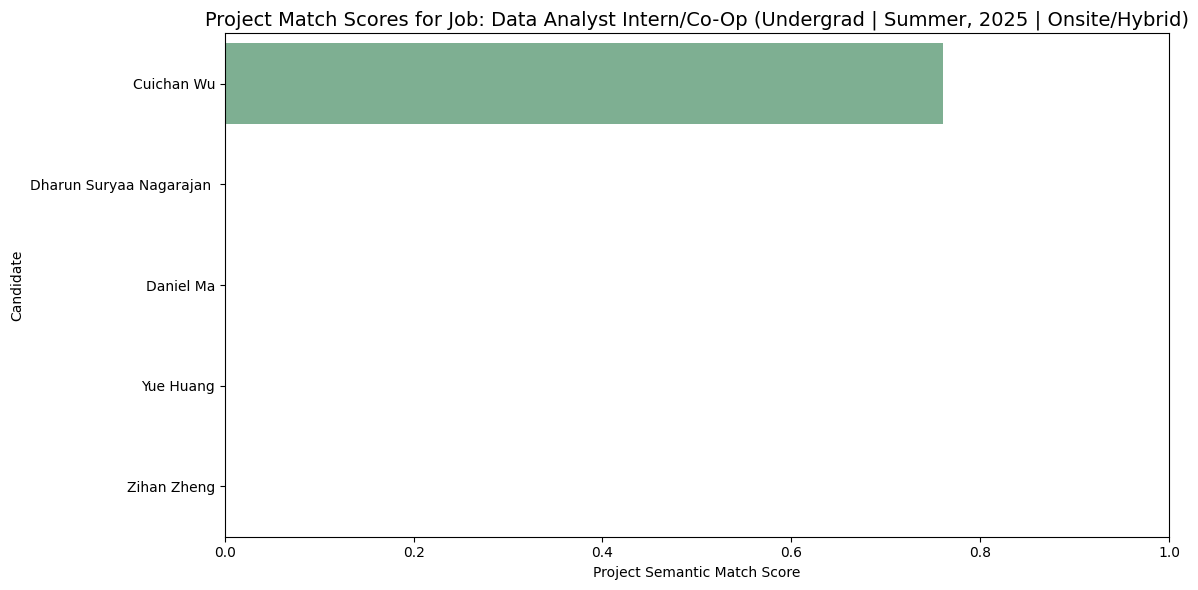

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


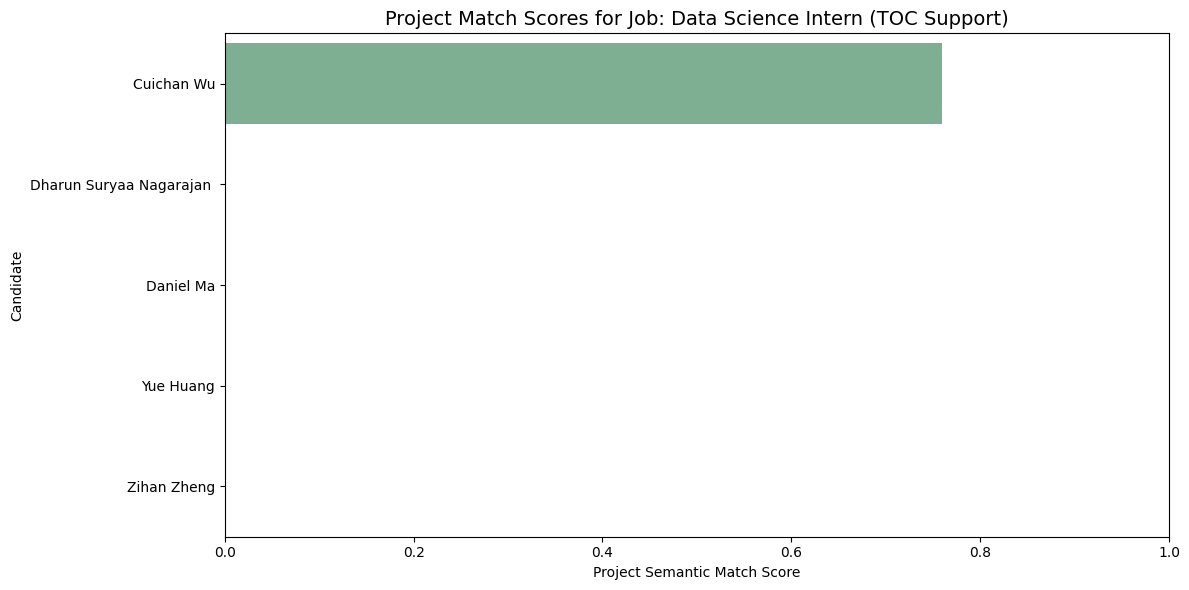

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\2396202241.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


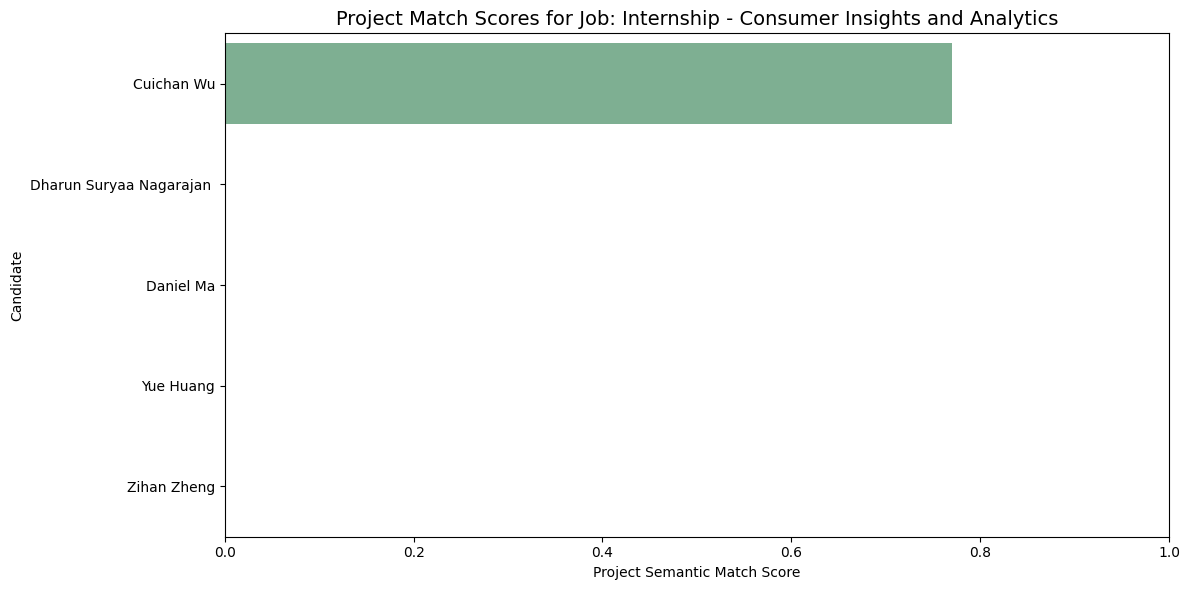

In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load Data
feature_df = pd.read_csv("semantic_feature_test_dataset.csv")
candidates_df = pd.read_csv("test_candidateprofiles_dataset.csv", encoding='latin1')
jobs_df = pd.read_csv("test_jobs_dataset.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job responsibility or role
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)",
                      str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split projects
def split_projects(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

# Parse individual project text
def parse_project(project_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", project_text))
    return {
        "name": parts.get("Project_Name", "").strip(),
        "description": parts.get("Project_Description", "").strip(),
        "skills": parts.get("Project_Skills", "").strip()
    }

# Scoring function with ensemble
def get_max_semantic_score(text1, text2):
    scores = []
    for name, model in models.items():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Main Matching Loop
project_scores = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        projects = split_projects(cand_row["Projects"])
        proj_scores = []
        explanations = []

        for proj in projects:
            parsed = parse_project(proj)
            score = 0.0

            if parsed["description"]:
                score = max(score, get_max_semantic_score(parsed["description"], job_text))
            if parsed["skills"]:
                score = max(score, get_max_semantic_score(parsed["skills"], job_text))

            if score > 0:
                proj_scores.append(score)
                explanations.append({
                    "Project": parsed["name"],
                    "Score": round(score, 4)
                })

        # Average top 3 projects
        avg_score = round(sum(sorted(proj_scores, reverse=True)[:3]) / min(3, len(proj_scores)), 4) if proj_scores else 0.0
        '''
        # Print matched project explanations
        print(f"\n Job: {job_title}")
        print(f" Candidate: {cand_name}")
        print(f"Final Project Score: {avg_score}")
        for ex in explanations:
            print(f"   -  {ex['Project']} → Score: {ex['Score']}")
        if not explanations:
            print("   -  No strong project matches.")
        '''

        project_scores.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "project_semantic_score": avg_score
        })

# Convert to DataFrame
project_score_df = pd.DataFrame(project_scores)

# Merge into original feature file
merged_df = pd.merge(feature_df, project_score_df, on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["project_semantic_score"] = merged_df["project_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["project_semantic_score_new"], inplace=True)

# Save final CSV
merged_df.to_csv("semantic_feature_test_dataset.csv", index=False)
print("Updated: 'project_semantic_score' column added to semantic_feature_test_dataset.csv")


# Visualizations per job
for job_title in project_score_df["Job_Title"].unique():
    subset = project_score_df[project_score_df["Job_Title"] == job_title].sort_values(by="project_semantic_score", ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")
    plt.title(f"Project Match Scores for Job: {job_title}", fontsize=14)
    plt.xlabel("Project Semantic Match Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()




In [15]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util

# Load input files
feature_df = pd.read_csv("semantic_feature_test_dataset.csv")
candidates_df = pd.read_csv("test_candidateprofiles_dataset.csv", encoding='latin1')
jobs_df = pd.read_csv("test_jobs_dataset.csv", encoding='utf-8')

# Load ensemble models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract responsibilities or role section from job description
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)",
                      str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split and parse publication blobs
def split_publications(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

def parse_publication(pub_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", pub_text))
    return {
        "title": parts.get("Publication_Title", "").strip(),
        "description": parts.get("Publication_Description", "").strip()
    }

# Compute max similarity score using all models
def get_max_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Build scores
score_records = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        publications = split_publications(cand_row["Publications"])
        pub_scores = []

        for pub in publications:
            parsed = parse_publication(pub)
            if parsed["description"]:
                score = get_max_ensemble_score(parsed["description"], job_text)
                pub_scores.append(score)

        if pub_scores:
            top_k_scores = sorted(pub_scores, reverse=True)[:3]
            avg_score = round(sum(top_k_scores) / len(top_k_scores), 4)
        else:
            avg_score = 0.0

        score_records.append({
            "Candidate_ID": cand_id,
            "Job_ID": job_id,
            "publication_semantic_score": avg_score
        })

# Create dataframe of new scores
pub_score_df = pd.DataFrame(score_records)

# Merge and update into original CSV
merged_df = pd.merge(feature_df, pub_score_df, on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["publication_semantic_score"] = merged_df["publication_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["publication_semantic_score_new"], inplace=True)

# Save final file
merged_df.to_csv("semantic_feature_test_dataset.csv", index=False)
print("Updated: publication_semantic_score saved to 'semantic_feature_test_dataset.csv'")

# Visualize candidate–job score match
for job in pub_score_df["Job_Title"].unique():
    subset = pub_score_df[pub_score_df["Job_Title"] == job].sort_values(by="publication_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")

    plt.title(f"Publication Semantic Match – {job}", fontsize=14)
    plt.xlabel("Publication Match Score (%)")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    '''for index, row in subset.iterrows():
        plt.text(row["publication_semantic_score"] + 0.01, index,
                 f"{row['Match (%)']}", va='center', fontsize=9, color='dark blue')'''
    plt.tight_layout()
    plt.show()

Updated: publication_semantic_score saved to 'semantic_feature_test_dataset.csv'


KeyError: 'Job_Title'

Education Sematic Score


Candidate: Dharun Suryaa Nagarajan  → Job: Data Science Intern - Summer 2025
Degree: Masters of sciences, Field: Data Science
     → Degree Score: 0.8449 | Field Score: 0.8404 
Degree: Bachelor of Technology, Field: Civil Engineering
     → Degree Score: 0.8078 | Field Score: 0.7699 

Candidate: Daniel Ma → Job: Data Science Intern - Summer 2025
Degree: Masters of sciences, Field: Computer Software Engineering
     → Degree Score: 0.8449 | Field Score: 0.7805 
Degree: Bachelors Degree, Field: Urban Planning
     → Degree Score: 0.847 | Field Score: 0.7215 

Candidate: Cuichan Wu → Job: Data Science Intern - Summer 2025
Degree: Master of Science, Field: Computer Science
     → Degree Score: 0.8274 | Field Score: 0.8134 
Degree: Bachelors Degree, Field: Business Marketing
     → Degree Score: 0.847 | Field Score: 0.7324 

Candidate: Yue Huang → Job: Data Science Intern - Summer 2025
Degree: Master of Science, Field: Data Science
     → Degree Score: 0.8274 | Field Score: 0.8404 
Degree:

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


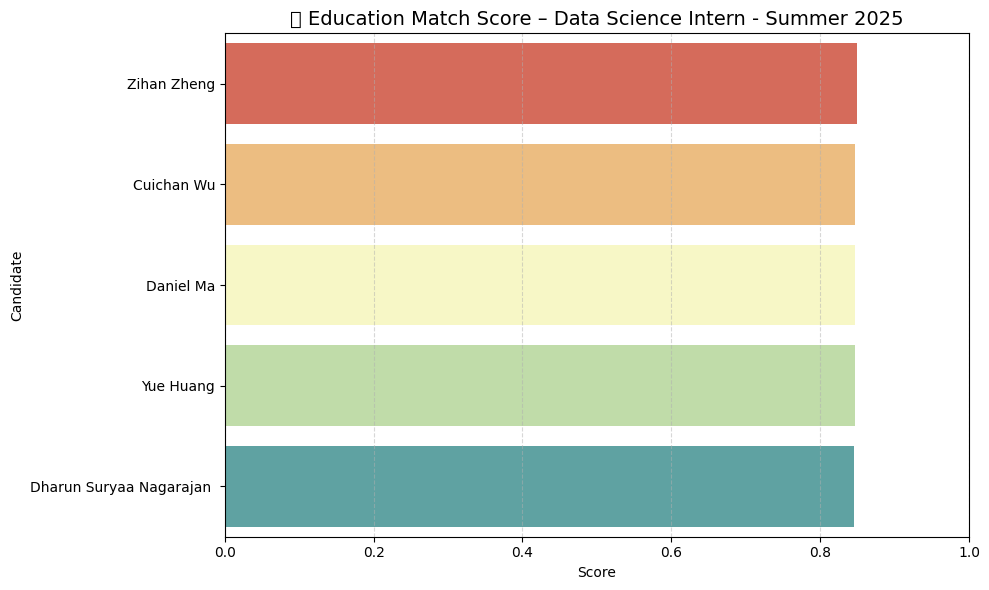

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


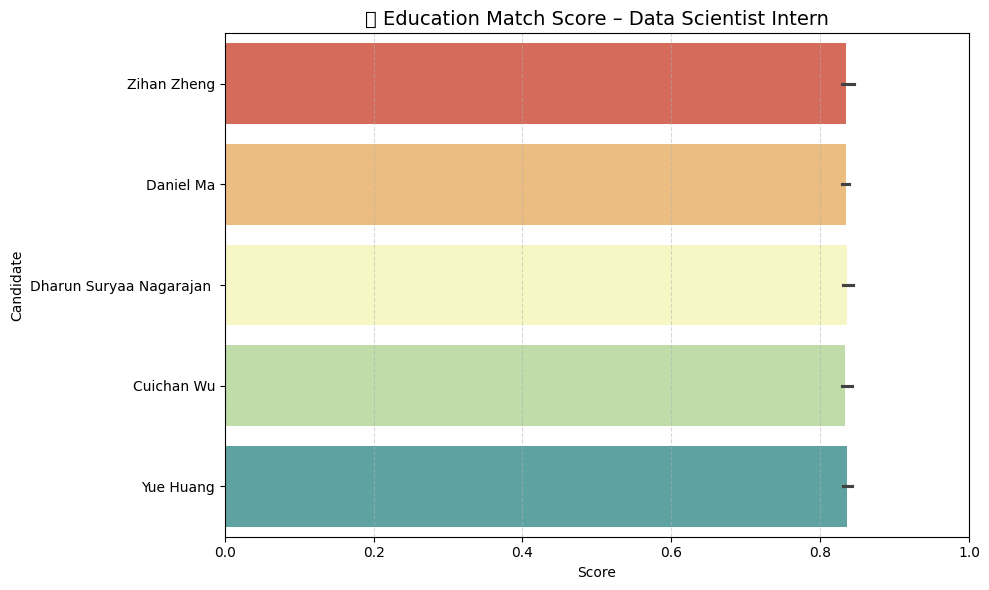

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


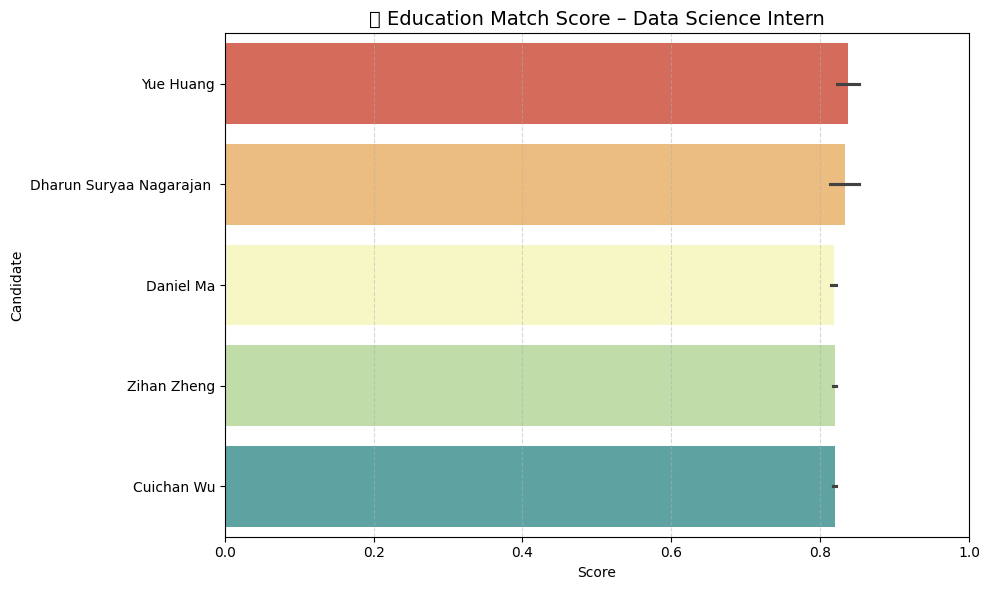

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


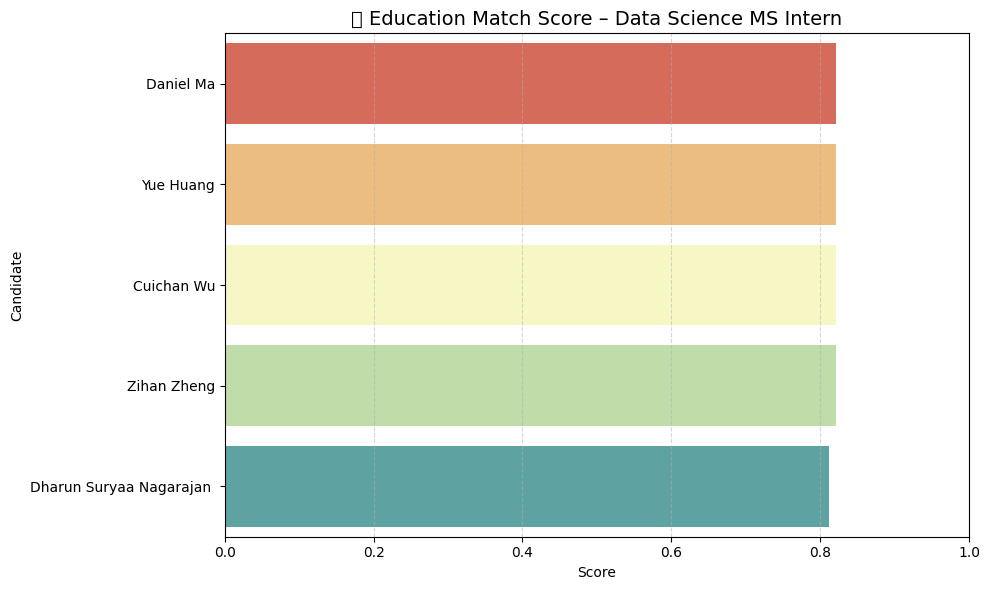

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


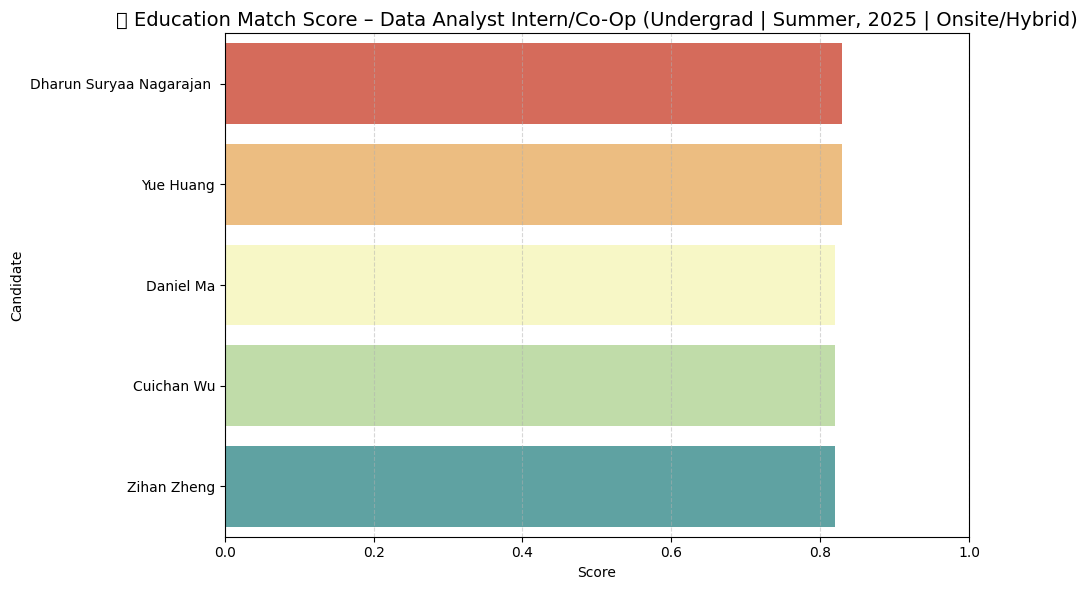

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


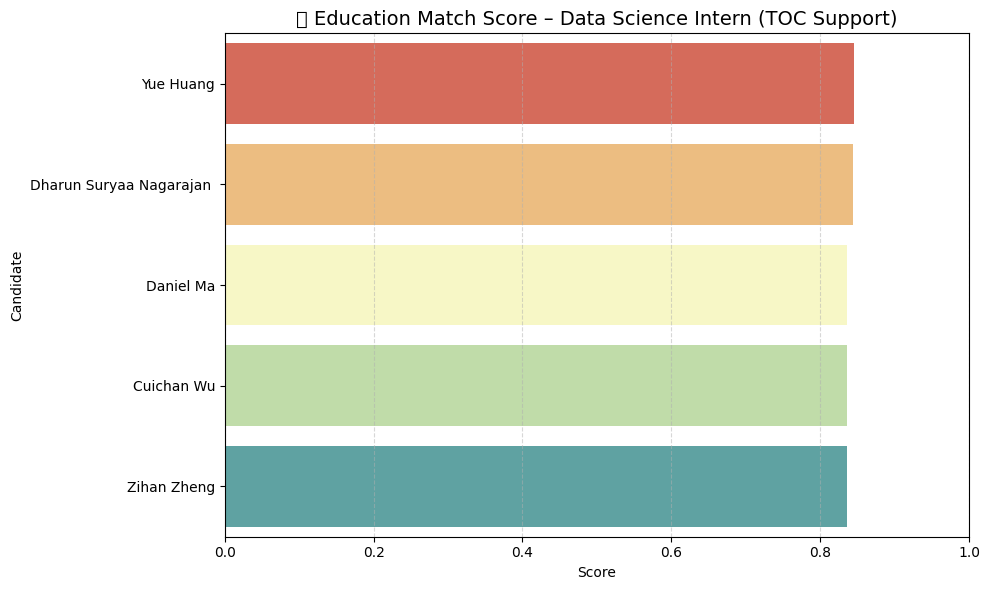

C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_66504\1097879623.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


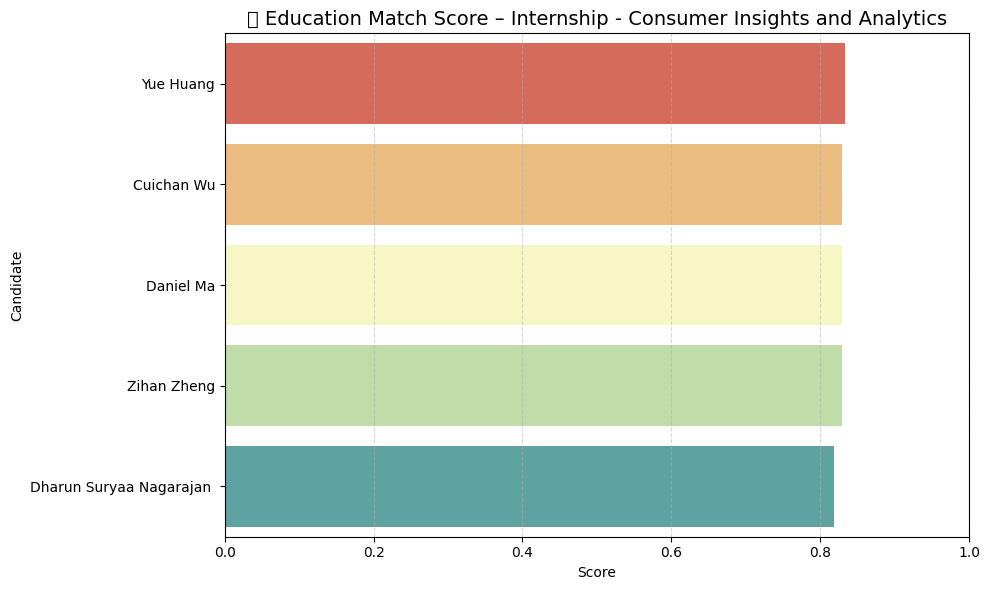

Saved updated semantic_feature_test_dataset CSV with 'education_semantic_score'


In [16]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load Data
feature_df = pd.read_csv("semantic_feature_test_dataset.csv")
candidates_df = pd.read_csv("test_candidateprofiles_dataset.csv", encoding='latin1')
jobs_df = pd.read_csv("test_jobs_dataset.csv", encoding='utf-8')

# Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract qualification section from job
def extract_qualification(text):
    match = re.search(r"(?:QUALIFICATIONS:|REQUIREMENTS:)\s*(.*?)(?:SKILLS:|RESPONSIBILITIES:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split education blob
def split_education(blob):
    return [e.strip() for e in str(blob).split('|') if e.strip()]

# Parse fields from education entry
def parse_education(text):
    parts = dict(re.findall(r"([\w_]+):\s*([^;|]+)", text))
    return {
        "degree": parts.get("Education_Degree", "").strip(),
        "field": parts.get("Field_Of_Study", "").strip(),
        "skills": [s.strip() for s in parts.get("Education_Skills", "").split(',') if s.strip().lower() != "none"],
        "end_year": int(parts.get("Education_End_Year", datetime.now().year)) if parts.get("Education_End_Year", "").lower() != "none" else datetime.now().year
    }


# Ensemble semantic score
def get_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Compute education match scores
education_scores = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    qual_text = extract_qualification(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        educations = split_education(cand_row["Education"])

        if not educations:
            print(f"\n No education found for candidate: {cand_name}")
            education_scores.append({
                "Candidate_ID": cand_id,
                "Candidate_Name": cand_name,
                "Job_ID": job_id,
                "Job_Title": job_title,
                "Company": company,
                "education_semantic_score": 0.0,
                "Match (%)": "0%"
            })
            continue

        parsed_educations = [parse_education(e) for e in educations]
        parsed_educations.sort(key=lambda x: x['end_year'], reverse=True)

        top_score = 0.0
        print(f"\nCandidate: {cand_name} → Job: {job_title}")
        for edu in parsed_educations:
            print(f"Degree: {edu['degree']}, Field: {edu['field']}")#, Skills: {edu['skills']}")

            degree_score = get_ensemble_score(edu["degree"], qual_text) if edu["degree"] else 0.0
            field_score = get_ensemble_score(edu["field"], qual_text) if edu["field"] else 0.0
            #skill_scores = [get_ensemble_score(skill, qual_text) for skill in edu["skills"]] if edu["skills"] else []
            #max_skill_score = max(skill_scores) if skill_scores else 0.0

            print(f"     → Degree Score: {round(degree_score, 4)} | Field Score: {round(field_score, 4)} ")#| Max Skill Score: {round(max_skill_score, 4)}")
            final_score = max(degree_score, field_score)#, max_skill_score)

            if final_score > top_score:
                top_score = final_score

        education_scores.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "education_semantic_score": round(top_score, 4),
            "Match (%)": f"{round(top_score * 100)}%"
        })

# Create DataFrame
edu_score_df = pd.DataFrame(education_scores)

# Show visual plot
for job in edu_score_df["Job_Title"].unique():
    subset = edu_score_df[edu_score_df["Job_Title"] == job].sort_values(by="education_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
    plt.title(f"🎓 Education Match Score – {job}", fontsize=14)
    plt.xlabel("Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# === Save to CSV (optional) ===
merged_df = pd.merge(feature_df, edu_score_df[["Candidate_ID", "Job_ID", "education_semantic_score"]],
                      on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["education_semantic_score"] = merged_df["education_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["education_semantic_score_new"], inplace=True)
merged_df.to_csv("semantic_feature_test_dataset.csv", index=False)
print("Saved updated semantic_feature_test_dataset CSV with 'education_semantic_score'")
